<a href="https://colab.research.google.com/github/DiveInKU/jaso-me-ai/blob/main/train_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#drive 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
%cd '/content/drive/MyDrive/Colab Notebooks/jasome-fast'

/content/drive/MyDrive/Colab Notebooks/jasome-fast


In [24]:
!pip install torch
!pip install transformers
!pip install fastai
!pip install fastcore fastai --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
from typing import Optional
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
from fastai.text.all import *
import fastai
import re

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [50]:
#download model and tokenizer
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
  eos_token='</s>') 
model = AutoModelWithLMHead.from_pretrained("skt/kogpt2-base-v2")

#test tokenizer
print(tokenizer.tokenize("안녕하세요. 한국어 GPT-2 입니다.😤:)l^o"))

#test model ouput
text = """꾸준함"""
input_ids = tokenizer.encode(text)
# for i in range(5):
gen_ids = model.generate(torch.tensor([input_ids]),
                          max_length=100,
                          repetition_penalty=2.0,
                          pad_token_id=tokenizer.pad_token_id,
                          eos_token_id=tokenizer.eos_token_id,
                          bos_token_id=tokenizer.bos_token_id,
                          use_cache=True,
                          temperature=1.1,
                          top_k=50,
                          top_p=0.8,
                          do_sample=True
                        )
generated = tokenizer.decode(gen_ids[0,:].tolist())
print(generated)
# print('{}. {}'.format(i, generated))

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:1116: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


['▁안녕', '하', '세', '요.', '▁한국어', '▁G', 'P', 'T', '-2', '▁입', '니다.', '😤', ':)', 'l^o']
꾸준함에서 오는 스트레스가 큰 편이다.
또한 우울증이 심할수록 치매 위험도가 높아진다.
따라서 평소 자신이 할 수 있는 일을 찾다가 잘못된 판단을 하게 되는 것이다.
치매는 그 자체로 정신건강의 문제가 아니다.
인생을 살아가는 동안 누구나 한번쯤은 겪게 될 문제다.
최근 한 설문조사 결과에 따르면 응답자의 77.7%가 자신감이나 자존감이 하락했다고 답했다.
그리고 20%는 불안감을 경험했고 33.3%만이 자신도 모르게 자살을 결심한 것으로 드러났다.
특히 최근 많은 분들이 자살에


In [67]:
import os
print(os.getcwd())
# print(os.listdir('../jasome-fastapi/after/train'))

train = ''
test = ''

# for original_file_name in os.listdir('../jasome-fastapi/after/train'):
#   f = open('../jasome-fastapi/after/train/'+original_file_name, 'r')
#   line = f.read()
#   line = " ".join(line.split())
#   print(line[0:100])
#   print('line', len(line))
#   train += line + " "
#   print('train', len(train))

# for original_file_name in os.listdir('../jasome-fastapi/after/test'):
#   f = open('../jasome-fastapi/after/test/'+original_file_name, 'r')
#   line = f.read()
#   line = " ".join(line.split())
#   print(line[0:100])
#   print('line', len(line))
#   test += line
#   print('test', len(test))


# print(train[:100])
# print(test[:100])



/content/drive/MyDrive/Colab Notebooks/jasome-fast


In [55]:
train_file = open('../jasome-fastapi/merged/all_train.txt', 'r')
line = train_file.read()
line = " ".join(line.split())
print(line[0:100])
print('line', len(line))
train += line + " "
print('train', len(train))
train_file.close()

저는 학부 연구생을 하면서 연구실 홈페이지 개발 및 관리를 맡은 경험이 있습니다. 당시 처음으로 웹 백엔드를 접하게 되었고 스프링 부트로 연구실 홈페이지를 개발했고 이를 바탕으로 
line 499494
train 1052050


In [57]:
test_file = open('../jasome-fastapi/merged/all_test.txt', 'r')
line = test_file.read()
line = " ".join(line.split())
print(line[0:100])
print('line', len(line))
test += line + " "
print('test', len(train))
test_file.close()

전문성의 중요도는 아무리 강조해도 부족합니다. 특히 요즘처럼 많은 지식에 쉽게 접근 할 수 있는 세상에서는 자신만의 전문성이 곧 자신의 정체성이라고 생각합니다. 저 또한 Gener
line 53059
test 1052050


In [58]:
print(len(train))
print(len(test))

1052050
106120


In [59]:
#model input output tokenizer
class TransformersTokenizer(Transform):
    def __init__(self, tokenizer): self.tokenizer = tokenizer
    def encodes(self, x): 
        toks = self.tokenizer.tokenize(x)
        return tensor(self.tokenizer.convert_tokens_to_ids(toks))
    def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
# train=lines[:int(len(lines)*0.9)]
# test=lines[int(len(lines)*0.9):]
# print(test)
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)
# dls.show_batch(max_n=2)

In [60]:
t = torch.randn(2,2).cuda()
t.is_cuda  # returns True

True

SuggestedLRs(valley=4.365158383734524e-05)


epoch,train_loss,valid_loss,perplexity,time
0,3.768489,3.564053,35.306011,01:22
1,3.104521,3.124458,22.747564,01:21
2,2.496315,2.790264,16.285313,01:21
3,2.114128,2.585115,13.264811,01:23
4,1.949103,2.510651,12.312944,01:21


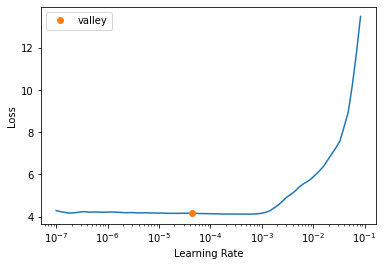

In [61]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]
        
        
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr=learn.lr_find()
print(lr)
learn.fit_one_cycle(5, lr) # 5에포크
# learn.fine_tune(3)

In [68]:
print('5 epoch done')
#test model ouput
prompt = """꾸준함"""
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
for i in range(5):
  preds = learn.model.generate(inp,
                           max_length=100,
                            repetition_penalty=2.0,
                            pad_token_id=tokenizer.pad_token_id,
                            eos_token_id=tokenizer.eos_token_id,
                            bos_token_id=tokenizer.bos_token_id,
                            use_cache=True,
                            temperature=1.1,
                            top_k=50,
                            top_p=0.8,
                            do_sample=True
                          ) 
  generated = tokenizer.decode(preds[0,:].tolist())
  print('{}. {}'.format(i, generated))

5 epoch done
0. 꾸준함도 느껴져서 제 장점을 살릴 수 있었습니다. 하지만 저는 단점을 보완하기 위해 다른 방법을 모색하다가 결국 실패하게 되었습니다 그 후에 많은 도전을 해보았는데 제가 성공했던 경험은 거의 없었기에 이 도전들은 실패로 끝날 뻔한 것이 가장 아쉬웠었 으며 새로운 방법이라는 것에 대한 두려움은 오히려 도전하는 것을 즐기는 것으로 만들었음 합니다. 첫 번째로는 SKY 멤버십을 유지하며 다양한 모바일 서비스를 만들어 보았지만 한계가 있어 어려움을 겪었고 이를 극복하기 위하여
1. 꾸준함/소신 있는 행동으로 좋은 팀워크를 유지하며 목표를 향해 꾸준히 나아가고 있습니다. 항상 현재에 안주하지 않고 도전하는 자세로 새로운 목표들을 끊임없이 설정하며 발전하고 있으며, 앞으로도 이러한 자세를 유지하여 끊임없는 자기계발을 하고 싶습니다. 저는 어렸을 때부터 가족과 함께 웃으며 지냈는데 어떤 때는 가족이 행복할 수 있을지도 생각해보지 않은 채로 슬슬 주변 사람들의 얘기를 들어주고 참여하려 노력하기도 했었습니다만, 이런 식으로 긍정적인 에너지를 전달하다 보면 주변에 좋지 못한 영향이 가거나 가족들의
2. 꾸준함에도 불구하고, 저의 단점은 끊임없이 부족한 점을 찾고 고쳐나가는 점입니다. 제 장점인 추진력과 꼼꼼함을 바탕으로 하나은행 인수합병을 이끌어냈습니다. 그 결과, 지난해 말 현재 우리금융에서 임원을 맡고있는 총 9명 중 4등이라는 상위권의 성적을 거두었습니다 관련분야에 대한 역량과 IT시스템 개발경험이 가장 풍부하다는 뜻밖을 보여주기 때문에 입사하게 되었다면 전공 지식을 넘어 실무적인 감각을 익혀 어떠한 어려움을 직면하더라도 포기하지 않고 돌파해내는 강점이
3. 꾸준함보다 더 중요하다고 생각합니다. 입사 후 조직에 대한 자부심과 책임감을 느끼고, 그에 걸맞은 성과를 보여드리겠습니다. 어렸을 때 즐겨하던 만화도 많았고 그래서 저는 게임에 대해 관심이 없었었습니다만 초등학교 6학년때, 한 포털사이트에서 다운로드받은 만화를 보고 흥미를 느끼게 되었고 그

In [69]:
!pwd

/content/drive/MyDrive/Colab Notebooks/jasome-fast


In [70]:
torch.save(model, "./models/processed/all_5epoch.pt")

In [71]:
learn.fit_one_cycle(5, lr) # 5에포크
print('10 epoch done')
prompt2 = """꾸준함"""
prompt_ids2 = tokenizer.encode(prompt)
inp2 = tensor(prompt_ids)[None].cuda()

epoch,train_loss,valid_loss,perplexity,time
0,1.948545,2.432673,11.389285,01:22
1,1.722902,2.155512,8.632308,01:19
2,1.367704,1.895157,6.653590,01:20
3,1.126724,1.707356,5.514365,01:20
4,1.012052,1.631314,5.110585,01:20


10 epoch done


In [72]:
for i in range(5):
  preds = learn.model.generate(inp2,
                           max_length=100,
                            repetition_penalty=2.0,
                            pad_token_id=tokenizer.pad_token_id,
                            eos_token_id=tokenizer.eos_token_id,
                            bos_token_id=tokenizer.bos_token_id,
                            use_cache=True,
                            temperature=1.1,
                            top_k=50,
                            top_p=0.8,
                            do_sample=True
                          ) 
  generated = tokenizer.decode(preds[0,:].tolist())
  print('{}. {}'.format(i, generated))

0. 꾸준함에도 불구하고 학우들은 고개를 갸웃거립니다 저의 대학 진학 시 컴퓨터공학을 전공으로 선택하였습니다. 그 이유는 학부과정을 통해 소프트웨어를 개발하기 위함이었고 또한 운영체제 프로세스를 스스로 공부하였기 때문입니다. 그러므로 졸업 작품 발표가 끝나고 소프트웨어 엔지니어 과목의 프로젝트 성과발표회에서 우수상을 수상할 수 있었습니다, 프로그래밍과 시스템프로젝트를 하며 사람들을 즐겁게 하였고 사람들에게 편리함을 주었음에 너무나도 행복했었습니다.” 이러한 경험을 통해서 사람들은 더 큰
1. 꾸준함 또한 저의 장점입니다. 어떠한 역경에서도 무너지지 않는 끈기와 노력은 소통의 벽을 허물었습니다. 2015년 OO전자에서 인턴십을 진행하며 팀 프로젝트 기획에 참여하고 결과물을 완성하였습니다 처음엔 전공지식으로는 부족해 실무적인 역량을 갖추기 위해 학부 2학년 과대표로서 선배님들과 네트워크를 형성할 수 있는 경험이 필요하다고 생각하여 정보통신대학에 진학하게 되었습니다. 또한,한 달간 SI 업체인 TCL 인턴과정을 통해 프로그래밍 실력도 키울
2. 꾸준함에도 늘 부족함이 있다고 생각이 들어 인턴을 하게 되었습니다. 부족한 역량을 채우기 위해 월드 IT 쇼를 참관하고 IBM에서 주관하는 '글로벌 컴퓨팅 솔루션 페어' 라는 행사를 참가하였습니다 저는 주어진 일에 대해 책임감을 가지면서 일을 진행하려고 노력하고 있습니다. 또한 팀의 성과를 위해서 고심하며 계획을 세우고 노력을 합니다. 제가 맡은 일은 더욱 좋은 결과물을 만들어 내고 다른 사람들에게 행복을 나누어 주는 것이 목표입니다. 이 목표를 가지게 된 시기는 대학교 1학년 때 입
3. 꾸준함에도 불구하고 저와 동기의 역할은 언제나 달랐습니다. 막연히 스타트업을 준비하는 대학생에게 동기유니트는 장난감이라는 것을 알았 다. 그 후로 개발자는 꿈을 포기하고 스스로 길을 개척하는 쪽으로 마음을 먹었습니다 중기적합자 전문가로의 진로를 목표로 세운 이상 초심으로 돌아가 다시 공부하겠습니까? 제게 가장 어려웠던 점은 아직은 기술력이

In [74]:
torch.save(model, "./models/processed/all_10epoch.pt")
torch.save(model.state_dict(), './models/processed/all_10epoch_dict.pt')

In [75]:
learn.fit_one_cycle(5, lr) 
print('15 epoch done')
prompt2 = """꾸준함"""
prompt_ids2 = tokenizer.encode(prompt)
inp2 = tensor(prompt_ids)[None].cuda()

epoch,train_loss,valid_loss,perplexity,time
0,1.038231,1.580587,4.857807,01:19
1,0.937498,1.403528,4.069530,01:18
2,0.723240,1.175914,3.241105,01:18
3,0.573238,1.012941,2.753689,01:19
4,0.500191,0.950381,2.586696,01:18


15 epoch done


In [76]:
for i in range(5):
  preds = learn.model.generate(inp2,
                           max_length=100,
                            repetition_penalty=2.0,
                            pad_token_id=tokenizer.pad_token_id,
                            eos_token_id=tokenizer.eos_token_id,
                            bos_token_id=tokenizer.bos_token_id,
                            use_cache=True,
                            temperature=1.1,
                            top_k=50,
                            top_p=0.8,
                            do_sample=True
                          ) 
  generated = tokenizer.decode(preds[0,:].tolist())
  print('{}. {}'.format(i, generated))

0. 꾸준함-소속감을 찾기, 동료와의 소통, 조별과제에서 우수한 성적을 얻기를 희망합니다. 학창시절 학급 임원, 프로젝트 리더 등 여러 관계자를 경험하며 다양한 경험과 강점을 얻었고, 이를 통해 얻은 협업능력과 융합역량을 바탕으로 최고의 가치 있는 일을 하고 싶다는 생각을 하게 되었습니다. 이러한 저의 열정과 창의성을 기반으로 <귀사>에서 성장해나갈 것입니다. 작년 교내에서 개최한 잡페스티벌에서 금융IT상담부스를 방문한 적이 있습니다. 많은 기업들에서 IT
1. 꾸준함 저는 사람을 대할 때 상대방을 항상 배려합니다. 그러므로 상대방이 불편함을 겪지 않도록 꼼꼼하게 대화를 이끌어야 합니다. 대학 시절, ‘남의 부탁을 거절하지 못해 낭패를 볼 수도 있다’는 내용의 문자메시지를 아르바이트를 하면서받았습니다. 누군가의 요구대로 정직하게 옳은 길을 택하여 앞으로 나아가는 모습이 매력적이었습니다 또한 상대방의 입장을 생각하면 타인의 의견을 헤아릴 수 있습니다. 제 성격 형성의 가장 큰 영향을 끼친 것은 대외활동이라 생각했기에 여러 활동을 했었다면 비교적
2. 꾸준함 저는 항상 새로운 목표들을 가지고 열정적으로 행동합니다. 스스로를 점검하기 위해 볼펜과 수첩을 들고 다니면서 메모를 하는 습관을 갖고 있습니다. 대학교 때 대학생 프로그래밍 경진대회에 참가하면서 호기심을 느끼게 되었고, 논리적인 예민함과 열정을 갖게 되었습니다. 대학원 때는 제안서를 작성하며 차량통신과의 아이디어를 창출하였고 시뮬레이션을 통한 지형 및 위치 정보 설계프로젝트 경험을 통해 알고리즘에 대한 역량을 키웠습니다 웹/모바일개발 직무를 수행하기 위해서는 먼저 IT 기본통계
3. 꾸준함도 느꼈고 결과적으로 저희 팀의 목표는 리더인 친구들에게 인정받아서 동아리 회장이라는 직책을 획득하였습니다. 같은 목표를 지향하고 있다고 생각하고 서로 발전하는 모습이 매우 멋있어서 많이 어울릴 수 있었지만 이런 성과에도 불구하고 각자 바쁘고, 또 힘들 것 같다고 생각해서 제가 역할을 나누어 맡는 게 맞는 건가 의구심이 들었

In [77]:
torch.save(model, "./models/processed/all_15epoch.pt")
torch.save(model.state_dict(), './models/processed/all_15epoch_dict.pt') 

In [78]:
learn.fit_one_cycle(5, lr) 
print('20 epoch done')
prompt2 = """꾸준함"""
prompt_ids2 = tokenizer.encode(prompt)
inp2 = tensor(prompt_ids)[None].cuda()

epoch,train_loss,valid_loss,perplexity,time
0,0.526386,0.958798,2.608559,01:19
1,0.502813,0.813226,2.255172,01:18
2,0.379892,0.652320,1.919991,01:18
3,0.291386,0.546851,1.727804,01:20
4,0.245062,0.504599,1.656321,01:30


20 epoch done


In [79]:
for i in range(5):
  preds = learn.model.generate(inp2,
                           max_length=100,
                            repetition_penalty=2.0,
                            pad_token_id=tokenizer.pad_token_id,
                            eos_token_id=tokenizer.eos_token_id,
                            bos_token_id=tokenizer.bos_token_id,
                            use_cache=True,
                            temperature=1.1,
                            top_k=50,
                            top_p=0.8,
                            do_sample=True
                          ) 
  generated = tokenizer.decode(preds[0,:].tolist())
  print('{}. {}'.format(i, generated))

0. 꾸준함에도 매일 업무 분담을 주장하는 것은 무리라고 생각합니다. 대학교 때 전공 공부 외에도 알고리즘 이해를 위해 국제프로그래밍경진대회(ACM-ICPC)를 준비했습니다. 과 소모임에 주기적으로 참여하였습니다 동아리 활동 중에 새로운 사람을 만나는 게 싫어서 남들과 다른 아르바이트를 하기 시작하였고 이 때문에 저 자신에게 더욱 상처를 받은 적이 있었습니다.” 하지만 제가 이를 해결했을 때, 자신감을 얻어 혼자 시험공부를 하기로 하였기에 주변 친구들은 “대학시험 더 어렵다”는
1. 꾸준함도 느끼지만 맡은 일에 대해 책임감을 갖고 끝까지 해내려고 노력하고 있습니다. 통신병으로 2년간 군 복무를 하며 부대 내 네트워크 망을 관리했습니다. 과로에 대한 피로감이 있었고 이 때문에 잦은 부대로 배치받아 일하기도 했었습니다 2014년 3월 9일 자 <귀사>에 입사하였음에 불구하고 여전히 부족한 인재로 생각됩니다. 신입사원에게 어떤 업무를 하고 싶은지 물어봤는데. 저는 말보다는 행동이 신뢰를 얻는다고 생각하여 컴퓨터공학부에 진학하게 되었합니다. 그렇게 전공
2. 꾸준함 그 이상을 느낀 경험은 없습니다. 하지만 <귀사>은 저에게 최고의 무대라고 생각하여 항상 도전하고 성취하는 자세로 임할 것입니다. 또한 2년차에 신입사원으로서 안전사고 예방 및 차량과 관련된 IT에 대해 전문가로 거듭나겠습니다 고기도 먹어 본 사람이 잘 먹는다는 말이 있습니다. 그렇게 많이 먹다가 점점, 더 자주 먹은다고 하던 김치버거가 생각났고, 이후로도 꾸준히 즐겨먹게 되었었습니다.” 라는 말을 들으며 한 때 버거의 맛집 1위였던
3. 꾸준함에도 학창시절을 되돌아보았을 때, 가장 기억의 남는 시기는 3학년 때 입시를 앞두고 영어 공부에 매진하여 해외축구를 즐겨보며 보냈던 시기입니다. 그때의 그런 성격은 지금도 변함이 없다고 저는 생각합니다. 그렇게 어렸을 때부터 운동을 좋아하여 태권도, 수영 등 단체 운동도 즐겼고, 그 안에서 조직력과 인내심을 키웠습니다. 고등학교 진학 후에도 학교 씨름대회에 나가서 

In [80]:
torch.save(model, "./models/processed/all_20epoch.pt")
torch.save(model.state_dict(), './models/processed/all_20epoch_dict.pt') 

In [81]:
learn.fit_one_cycle(5, lr) 
print('25 epoch done')
prompt2 = """꾸준함"""
prompt_ids2 = tokenizer.encode(prompt)
inp2 = tensor(prompt_ids)[None].cuda()

epoch,train_loss,valid_loss,perplexity,time
0,0.271612,0.536124,1.709368,01:22
1,0.281130,0.475656,1.609070,01:21
2,0.212054,0.384629,1.469069,01:22
3,0.160505,0.327979,1.388159,01:22
4,0.133881,0.309473,1.362707,01:21


25 epoch done
